# Small Ion Crystal Geometries
Ions trapped in a linear Paul trap can be squeezed into 2D crystals. The geometry of the crystal is quick different for small ion numbers. This notebook calculates what those geometries will look like and relative distances between ions.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Confining Potential
The effective confining potential for 2D ion crystals is a harmonic oscillator with frequency $\omega_r$ and radial distance $r$.

$$
V_h = \frac{1}{2}m \omega_r^2 r^2
$$

## Ion-ion Interaction Energy
The ion's repel each other through the Coulomb interactions. Since I'm only interested in relative distances, we can simplify this as

$$
V_c =\frac{q^2}{4\pi \epsilon_0} \sum_i^N\frac{1}{|r - r_i|}
$$

Minimizing these potentials will give the ion equilibrium positions.

In [13]:
# Constants
q = 1.60217662 * 1e-19
ep_0 = 8.85418782 * 1e-12
m = 170.9363258 * 1.66054* 1e-27
w_r = 2*np.pi * 2e6

# Parameters
n_ions = 3

# x, y grid
x = np.linspace(-1000, 1000, 2000) * 1e-3
y = np.linspace(-1000, 1000, 2000) * 1e-3

XX, YY = np.meshgrid(x, y)

Vh = 1/2 * m * w_r**2 * (XX**2 + YY**2)

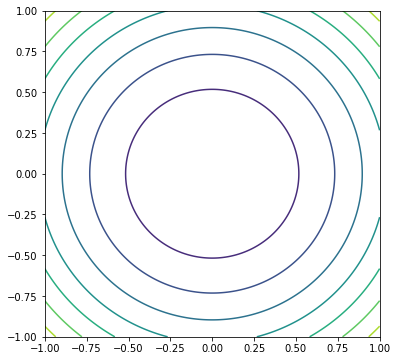

In [16]:
plt.figure(figsize=(6,6))
plt.contour(XX, YY, Vh)
plt.title('Harmonic Trapping Potential')

In [90]:
z = np.array([[1,0],[0,-1]])
x = np.array([[0,1],[1,0]])
iden = np.identity(2)

state_map = {0:'0000',1:'0001',2:'0010',3:'0011',4:'0100',5:'0101',6:'0110',7:'0111',8:'1000',9:'1001',10:'1010',11:'1011',12:'1100',13:'1101',14:'1110',15:'1111'}

# Generate nearest neighbor interactions
nn = np.kron(np.kron(np.kron(iden,iden),z),z)
nn += np.kron(np.kron(np.kron(iden,z),iden),z)
nn += np.kron(np.kron(np.kron(z,iden),z),iden)
nn += np.kron(np.kron(np.kron(z,z),iden),iden)

# Generate next-nearest neighbor interactions
nnn = np.kron(np.kron(np.kron(z,iden),iden),z)
nnn += np.kron(np.kron(np.kron(iden,z),z),iden)

# Generate external field
ef = np.kron(np.kron(np.kron(iden,iden),iden),x)
ef += np.kron(np.kron(np.kron(iden,iden),x),iden)
ef += np.kron(np.kron(np.kron(iden,x),iden),iden)
ef += np.kron(np.kron(np.kron(x,iden),iden),iden)

In [92]:
# Remember J_0 and J_1 > 1 for antiferromangetic interactions
def H(J_0, J_1, h):
    return J_0 * nn + J_1 * nnn + h * ef

H(1,0,0)

array([[ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -4.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -4.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

## Check ferromagnetic case, no next-nearest neighbor

In [114]:
eig_vals, eig_vecs = np.linalg.eig(H(-1,0,1))
eig_vecs = np.round(eig_vecs, 6)
eig_vals = np.round(eig_vals, 6)
eig_vals

array([-5.226252, -4.828427,  5.226252, -2.164784,  2.164784,  0.828427,
        4.828427, -0.828427,  2.      ,  2.      , -2.      , -2.      ,
        0.      , -0.      ,  0.      ,  0.      ])

In [116]:
min_val = np.min(eig_vals)
ground_states = []
for i in range(len(eig_vals)):
    if(eig_vals[i] == min_val):
        ground_states.append(eig_vecs[i])

for g_state in ground_states:
    print(state_map[np.argmax(g_state)])

0001


Ground states (-4 eigenvalue) are all up or all down spins as expected for the ferromagnetic case with only nearest neighbor interactions

## Check antiferromagnetic case, no next-nearest neighbor

In [107]:
eig_vals, eig_vecs = np.linalg.eig(H(1,0,1))
eig_vecs = np.round(eig_vecs, 6)
eig_vals = np.round(eig_vals, 6)
eig_vals

array([ 5.226252+0.j,  4.828427+0.j,  2.164784+0.j, -5.226252+0.j,
       -0.828427+0.j, -2.164784+0.j, -4.828427+0.j, -2.      +0.j,
        0.828427+0.j,  2.      +0.j,  2.      +0.j, -2.      +0.j,
       -0.      +0.j, -0.      -0.j, -0.      +0.j, -0.      +0.j])

In [102]:
min_val = np.min(eig_vals)
ground_states = []
for i in range(len(eig_vals)):
    if(eig_vals[i] == min_val):
        ground_states.append(eig_vecs[i])

for g_state in ground_states:
    print(state_map[np.argmax(g_state)])

0111


Ground states (-4 eigenvalue) are alternating up and down as expected for the antiferromagnetic case with only nearest neighbor interactions

## Equal weight nn and nnn interactions

In [98]:
eig_vals, eig_vecs = np.linalg.eig(H(1,1,0))
eig_vals

array([ 6.,  0.,  0., -2.,  0., -2., -2.,  0.,  0., -2., -2.,  0., -2.,
        0.,  0.,  6.])

In [99]:
min_val = np.min(eig_vals)
ground_states = []
for i in range(len(eig_vals)):
    if(eig_vals[i] == min_val):
        ground_states.append(eig_vecs[i])
        
print("Ground states:")
for g_state in ground_states:
    print(state_map[np.argmax(g_state)])

Ground states:
0011
0101
0110
1001
1010
1100
